In [1]:
import numpy as np

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('tree.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
import seaborn as sns

<Axes: xlabel='Species', ylabel='count'>

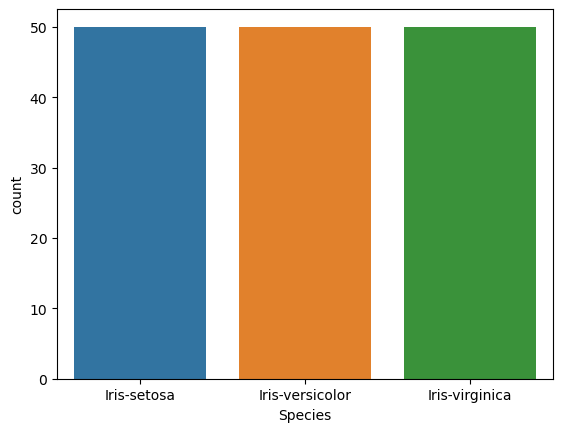

In [7]:
sns.countplot(x='Species',data=df)

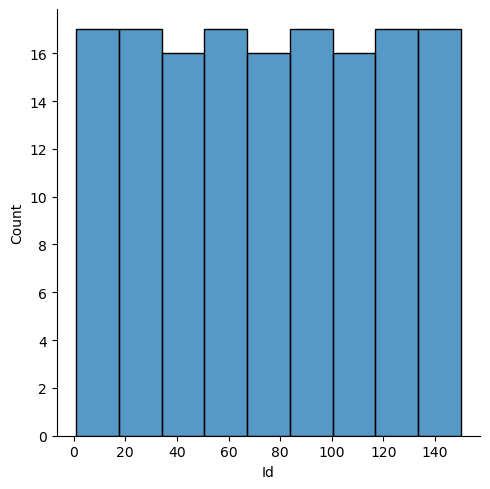

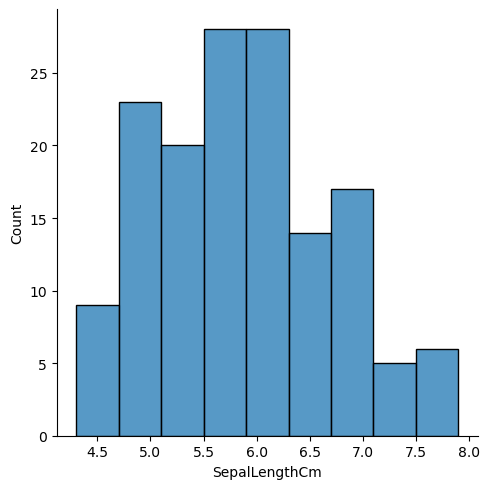

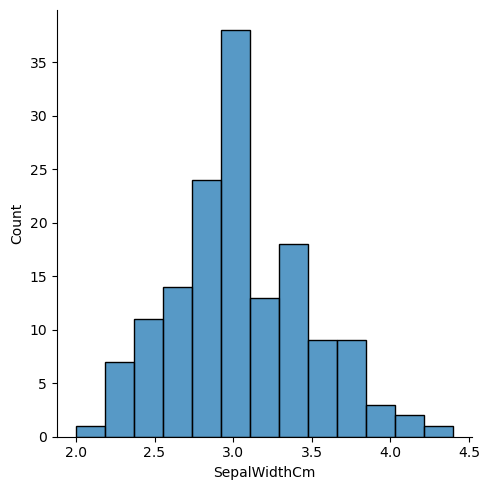

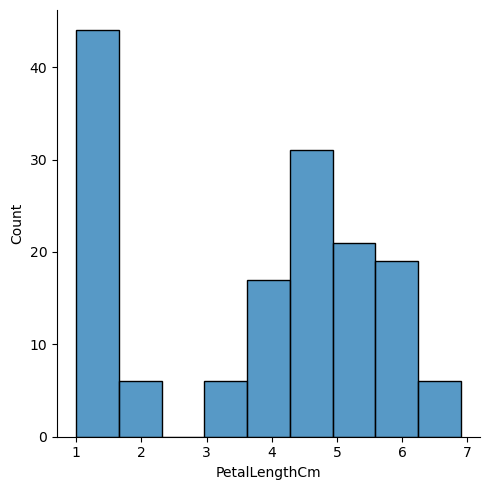

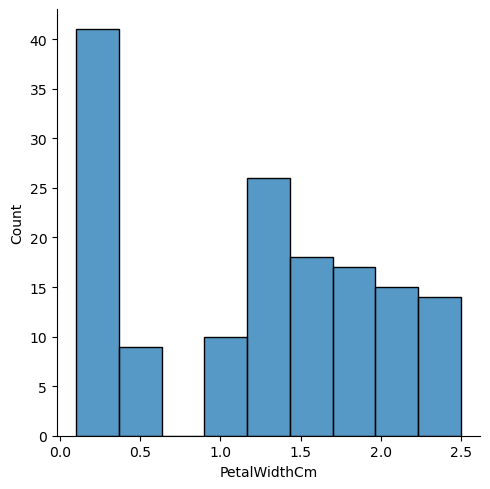

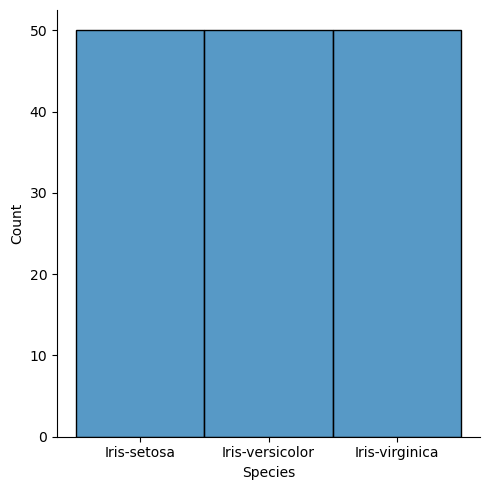

In [8]:
for column in df:
 sns.displot(x=column,data=df)

<Axes: ylabel='Density'>

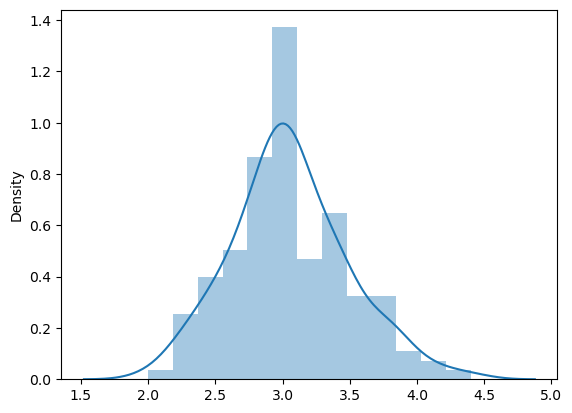

In [9]:
sns.distplot(x=df.SepalWidthCm)

In [10]:
import matplotlib.pyplot as plt

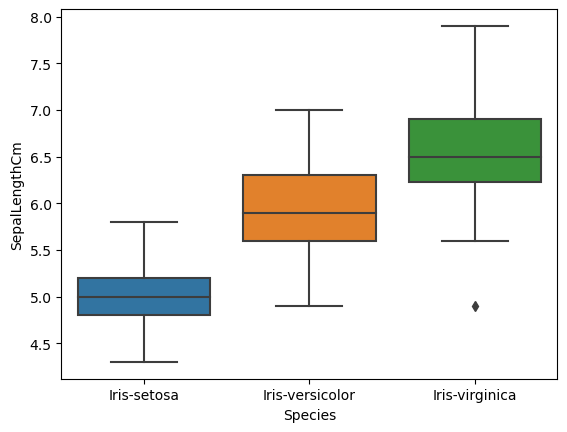

In [11]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df['species']=le.fit_transform(df['Species'])

In [15]:
df.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0


In [16]:
df=df.drop(['Species'],axis=1)

In [17]:
x=df.drop(['species','Id'],axis=1)
y=df[['species']]

In [18]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [21]:
x_train.shape

(135, 4)

In [22]:
x_test.shape

(15, 4)

In [23]:
y_train.shape

(135, 1)

In [24]:
y_test.shape

(15, 1)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc=DecisionTreeClassifier()

In [27]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
pred_train=dtc.predict(x_train)
pred=dtc.predict(x_test)
accuracy=accuracy_score(y_test,pred)*100
print(accuracy)

100.0


In [30]:
sepal_length=float(input("Enter sepal length:"))
sepal_width=float(input("Enter sepal width:"))
petal_length=float(input("Enter sepal length:"))
petal_width=float(input("Enter sepal width:"))
prediction=dtc.predict(np.array([[sepal_length,sepal_width,petal_length,petal_width]]))
print("The flower belongs to class:",prediction)

Enter sepal length:1
Enter sepal width:2
Enter sepal length:3
Enter sepal width:4
The flower belongs to class: [2]


In [31]:
dtc.predict([[5.1,3.1,1.4,0.2]])

array([0])

In [32]:
correlation_matrix=df.corr()

In [33]:
plt.figure(figsize=(5,6))

<Figure size 500x600 with 0 Axes>

<Figure size 500x600 with 0 Axes>

<Axes: >

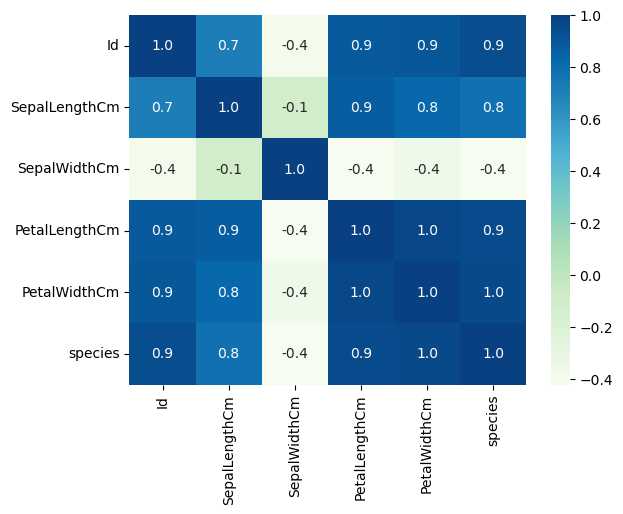

In [34]:
sns.heatmap(correlation_matrix,cbar=True,fmt='.1f',annot=True,cmap='GnBu')